In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GRAPHS_FOLDER = 'Graphs/{}.png'

## Пункт 1

Исследуйте зависимость качества классификации от количества классификаторов в ансамбле для алгоритмов бэггинга на наборе данных glass.csv с различными базовыми классификаторами. Постройте графики зависимости качества классификации при различном числе классификаторов, объясните полученные результаты. 

In [3]:
data = pd.read_csv('glass.csv')
data = data.drop('Id', axis=1)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], train_size=0.8, random_state=55)

In [5]:
def get_ensemblimg_results(ensemble_method, estimators, X_test, y_test, X_train, y_train):
    acc = np.zeros((len(estimators), 50))
    for i, estimator in zip(range(len(estimators)), estimators):
        for j in range(1, 51):
            clf = ensemble_method(n_estimators=j, base_estimator=estimator, random_state=55)
            clf = clf.fit(X_train, y_train)
            acc[i][j - 1] = clf.score(X_test, y_test)
    return acc

In [6]:
k_neighbors = KNeighborsClassifier()
svc = SVC(kernel='linear')
dec_tree = DecisionTreeClassifier()

estimators = [k_neighbors, svc, dec_tree]
acc = get_ensemblimg_results(BaggingClassifier, estimators, X_test, y_test, X_train, y_train)

In [7]:
def build_graph(history, titles, graph_name):
    fig, axes = plt.subplots(round(len(history) / 2), 2, figsize=(14, 10))
    plt.subplots_adjust(hspace=0.3)
    axes = np.ravel(axes)
    for ax, data, title in zip(axes, history, titles):
        ax.plot(range(1, 51), data)
        ax.set_title(title, fontsize=16)
        ax.set_xlabel('Estimators number', fontsize=14)
        ax.set_ylabel('Accuracy', fontsize=14)
    if len(history) % 2 != 0:
        fig.delaxes(axes[-1])
    
    plt.savefig(GRAPHS_FOLDER.format(graph_name), bbox_inches='tight')
    plt.show()

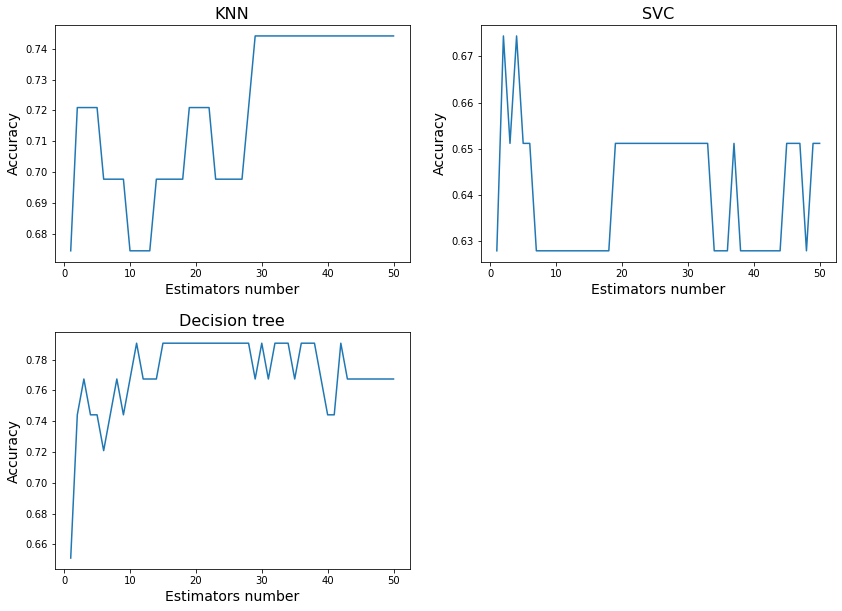

In [8]:
titles = ['KNN', 'SVC', 'Decision tree']
build_graph(acc, titles, 'Task 1. Bagging')

## Пункт 2

Исследуйте зависимость качества классификации от количества классификаторов в ансамбле для алгоритма бустинга (например, AdaBoost) на наборе данных vehicle.csv с различными базовыми классификаторами. Постройте графики зависимости качества классификации при различном числе классификаторов, объясните полученные результаты. 

In [9]:
data = pd.read_csv('vehicle.csv')
data.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], train_size=0.8, random_state=55)

In [11]:
svc_lin = SVC(kernel='linear', probability=True)
svc_rbf = SVC(probability=True)
dec_tree = DecisionTreeClassifier()
dec_tree_restr = DecisionTreeClassifier(max_depth=3)

estimators = [svc_lin, svc_rbf, dec_tree, dec_tree_restr]
acc = get_ensemblimg_results(AdaBoostClassifier, estimators, X_test, y_test, X_train, y_train)

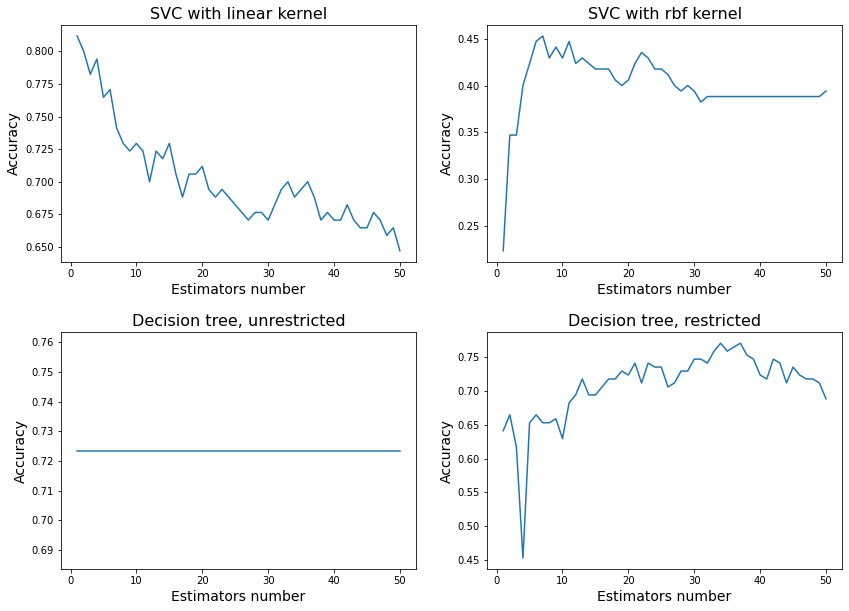

In [12]:
titles = ['SVC with linear kernel',
          'SVC with rbf kernel',
          'Decision tree, unrestricted',
          'Decision tree, restricted']
build_graph(acc, titles, 'Task 2. Boosting')

## Пункт 3

Постройте мета-классификатор для набора данных titanic_train.csv используя стекинг и оцените качество классификации на titanic_train.csv 

In [13]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [16]:
data.astype('object').describe(include='all').loc['unique', :]

Survived        2
Pclass          3
Sex             2
Age          88.0
SibSp           7
Parch           7
Fare        248.0
Embarked        3
Name: unique, dtype: object

In [17]:
data = data.fillna({'Age': data['Age'].median(), 'Embarked': data['Embarked'].mode()})
data = pd.get_dummies(data, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])

In [18]:
X = data.loc[:, data.columns != 'Survived']
y = data.loc[:, data.columns == 'Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [19]:
num_cols = ['Age', 'Fare']
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


processor = make_column_transformer(
    (StandardScaler(), num_cols),
    remainder='passthrough'
)

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('SVC_lin', make_pipeline(processor, LinearSVC(max_iter=2000, random_state=42))),
    ('SVC_rbf', make_pipeline(processor, SVC(random_state=42)))
]

clf = StackingClassifier(estimators=estimators)
clf.fit(X_train, y_train.values.ravel())
print(clf.score(X_test, y_test))

0.8100558659217877


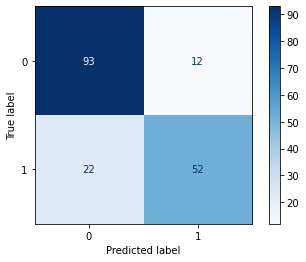

In [20]:
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
plt.savefig(GRAPHS_FOLDER.format('Task 3. Stacking'), bbox_inches='tight')
plt.show()